### Analysis

### **Section 1: Load and prepare the data**

#### Section 1.A. Separate the region data

+ **load the raw data set and transform time data from string into the value.**

In [1]:
import pandas as pd
prices = pd.read_csv('average-property-price.csv')
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
display(prices)

#Have a view of raw dataset.
for col in prices.columns:
    print('\t%s: %d' % (col, prices[col].isna().sum()))

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


	Area: 0
	Code: 0
	Detached: 36
	Semi: 36
	Terraced: 20
	Flat: 0
	Month: 0


In [2]:
#Check the component of the group whose code start with 'E12'.
prices.Code.unique()

array(['E06000001', 'E06000002', 'E06000003', 'E06000004', 'E06000005',
       'E06000006', 'E06000007', 'E06000008', 'E06000009', 'E06000010',
       'E06000011', 'E06000012', 'E06000013', 'E06000014', 'E06000015',
       'E06000016', 'E06000017', 'E06000018', 'E06000019', 'E06000020',
       'E06000021', 'E06000022', 'E06000023', 'E06000024', 'E06000025',
       'E06000026', 'E06000027', 'E06000028', 'E06000029', 'E06000030',
       'E06000031', 'E06000032', 'E06000033', 'E06000034', 'E06000035',
       'E06000036', 'E06000037', 'E06000038', 'E06000039', 'E06000040',
       'E06000041', 'E06000042', 'E06000043', 'E06000044', 'E06000045',
       'E06000046', 'E06000047', 'E06000049', 'E06000050', 'E06000051',
       'E06000052', 'E06000054', 'E06000055', 'E06000056', 'E06000057',
       'E08000001', 'E08000002', 'E08000003', 'E08000004', 'E08000005',
       'E08000006', 'E08000007', 'E08000008', 'E08000009', 'E08000010',
       'E08000011', 'E08000012', 'E08000013', 'E08000014', 'E080

In [3]:
#Conclude them as 'region_code'.
region_code = ['E12000001', 'E12000002', 'E12000003', 'E12000004',
       'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009']

+ **Separate the data set into different groups with two location levels.**

In [4]:
prices_region = pd.DataFrame()

prices_area = prices

for a in region_code :
#Region level
    prices_region = prices_region.append(prices.loc[prices.Code == a])

#Area level    
    prices_area   = prices_area.drop(prices_area[prices_area.Code == a].index,axis= 0)
    
display(prices_region)
display(prices_area)

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


#### Section 1.B. Add to each area price record the region information

In [5]:
#Load the location-codes data
location_codes = pd.read_csv('location-codes.csv')

#Have a view of the dataset about different regions.
location_codes 

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


In [6]:
#Merge two data set as requirement
prices_area_region = pd.merge(prices_area, location_codes, how= 'left', left_on = 'Code', right_on = 'AuthorityCode' ).drop(['AuthorityCode','AuthorityName'],axis = 1)

display(prices_area_region)

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E12000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E12000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E12000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E12000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E12000001,North East
...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E12000005,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E12000005,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E12000005,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E12000005,West Midlands


#### Section 1.C. Missing values

In [7]:
#Check the location of Nan values.
for col in prices_area_region.columns:
    print('\t%s: %d' % (col, prices_area_region[col].isna().sum()))

	Area: 0
	Code: 0
	Detached: 36
	Semi: 36
	Terraced: 20
	Flat: 0
	Month: 0
	RegionCode: 0
	RegionName: 0


In [8]:
#Replace missing value with means.
prices_area_region['Detached'].fillna(value =prices_area_region['Detached'].mean(),inplace = True)
prices_area_region['Semi'].fillna(value =prices_area_region['Semi'].mean(),inplace = True)
prices_area_region['Terraced'].fillna(value =prices_area_region['Terraced'].mean(),inplace = True)

#Check again.
for col in prices_area_region.columns:
    print('\t%s: %d' % (col, prices_area_region[col].isna().sum()))

	Area: 0
	Code: 0
	Detached: 0
	Semi: 0
	Terraced: 0
	Flat: 0
	Month: 0
	RegionCode: 0
	RegionName: 0


### **Section 2: Trends**

#### Section 2.A. Plot trends of the prices and comment

In [9]:
#Have a view of the names of different regions.
prices_region.Area.unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands Region', 'East of England',
       'London', 'South East', 'South West'], dtype=object)

Text(0.5, 1.0, 'Detached')

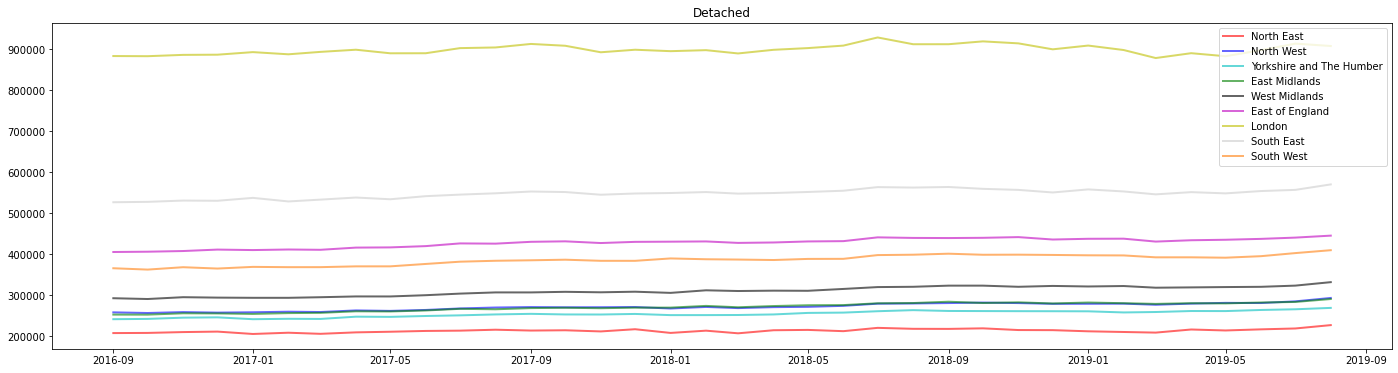

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(24,6))

property_type = "Detached"

plt.plot(prices_region["Month"].loc[prices_region.Area == 'North East'] , prices_region[property_type].loc[prices_region.Area == 'North East'] ,  color='r', lw=2, alpha=0.6, label='North East')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'North West'] , prices_region[property_type].loc[prices_region.Area == 'North West'] ,  color='b', lw=2, alpha=0.6, label='North West')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'Yorkshire and The Humber'] , prices_region[property_type].loc[prices_region.Area == 'Yorkshire and The Humber'] ,  color='c', lw=2, alpha=0.6, label='Yorkshire and The Humber')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'East Midlands'] , prices_region[property_type].loc[prices_region.Area == 'East Midlands'] ,  color='g', lw=2, alpha=0.6, label='East Midlands')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'West Midlands Region'] , prices_region[property_type].loc[prices_region.Area == 'West Midlands Region'] ,  color='k', lw=2, alpha=0.6, label='West Midlands')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'East of England'] , prices_region[property_type].loc[prices_region.Area == 'East of England'] ,  color='m', lw=2, alpha=0.6, label='East of England')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'London'] , prices_region[property_type].loc[prices_region.Area == 'London'] ,  color='y', lw=2, alpha=0.6, label='London')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'South East'] , prices_region[property_type].loc[prices_region.Area == 'South East'] ,  color='0.8', lw=2, alpha=0.6, label='South East')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'South West'] , prices_region[property_type].loc[prices_region.Area == 'South West'] ,  color='tab:orange', lw=2, alpha=0.6, label='South West')
ax.legend()
ax.set_title (property_type)

Text(0.5, 1.0, 'Flat')

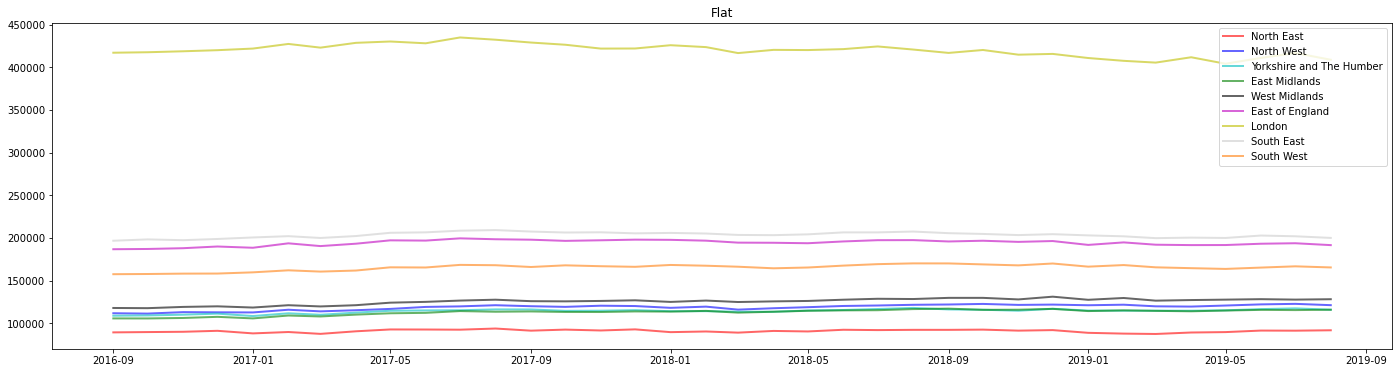

In [11]:
import matplotlib.pyplot as plt

property_type = "Flat"

fig, ax = plt.subplots(1, 1, figsize=(24,6))

plt.plot(prices_region["Month"].loc[prices_region.Area == 'North East'] , prices_region[property_type].loc[prices_region.Area == 'North East'] ,  color='r', lw=2, alpha=0.6, label='North East')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'North West'] , prices_region[property_type].loc[prices_region.Area == 'North West'] ,  color='b', lw=2, alpha=0.6, label='North West')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'Yorkshire and The Humber'] , prices_region[property_type].loc[prices_region.Area == 'Yorkshire and The Humber'] ,  color='c', lw=2, alpha=0.6, label='Yorkshire and The Humber')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'East Midlands'] , prices_region[property_type].loc[prices_region.Area == 'East Midlands'] ,  color='g', lw=2, alpha=0.6, label='East Midlands')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'West Midlands Region'] , prices_region[property_type].loc[prices_region.Area == 'West Midlands Region'] ,  color='k', lw=2, alpha=0.6, label='West Midlands')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'East of England'] , prices_region[property_type].loc[prices_region.Area == 'East of England'] ,  color='m', lw=2, alpha=0.6, label='East of England')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'London'] , prices_region[property_type].loc[prices_region.Area == 'London'] ,  color='y', lw=2, alpha=0.6, label='London')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'South East'] , prices_region[property_type].loc[prices_region.Area == 'South East'] ,  color='0.8', lw=2, alpha=0.6, label='South East')
plt.plot(prices_region["Month"].loc[prices_region.Area == 'South West'] , prices_region[property_type].loc[prices_region.Area == 'South West'] ,  color='tab:orange', lw=2, alpha=0.6, label='South West')
ax.legend()
ax.set_title (property_type)

+ ***From the charts above, for detached property, it is clear that London has a highest price. However, the second one is in South East region. And the lowest price is in North East.***

+ ***For the price of flat, there are similar distributions with detached property in these regions, but apparently flat price is much lower than the detached house.***

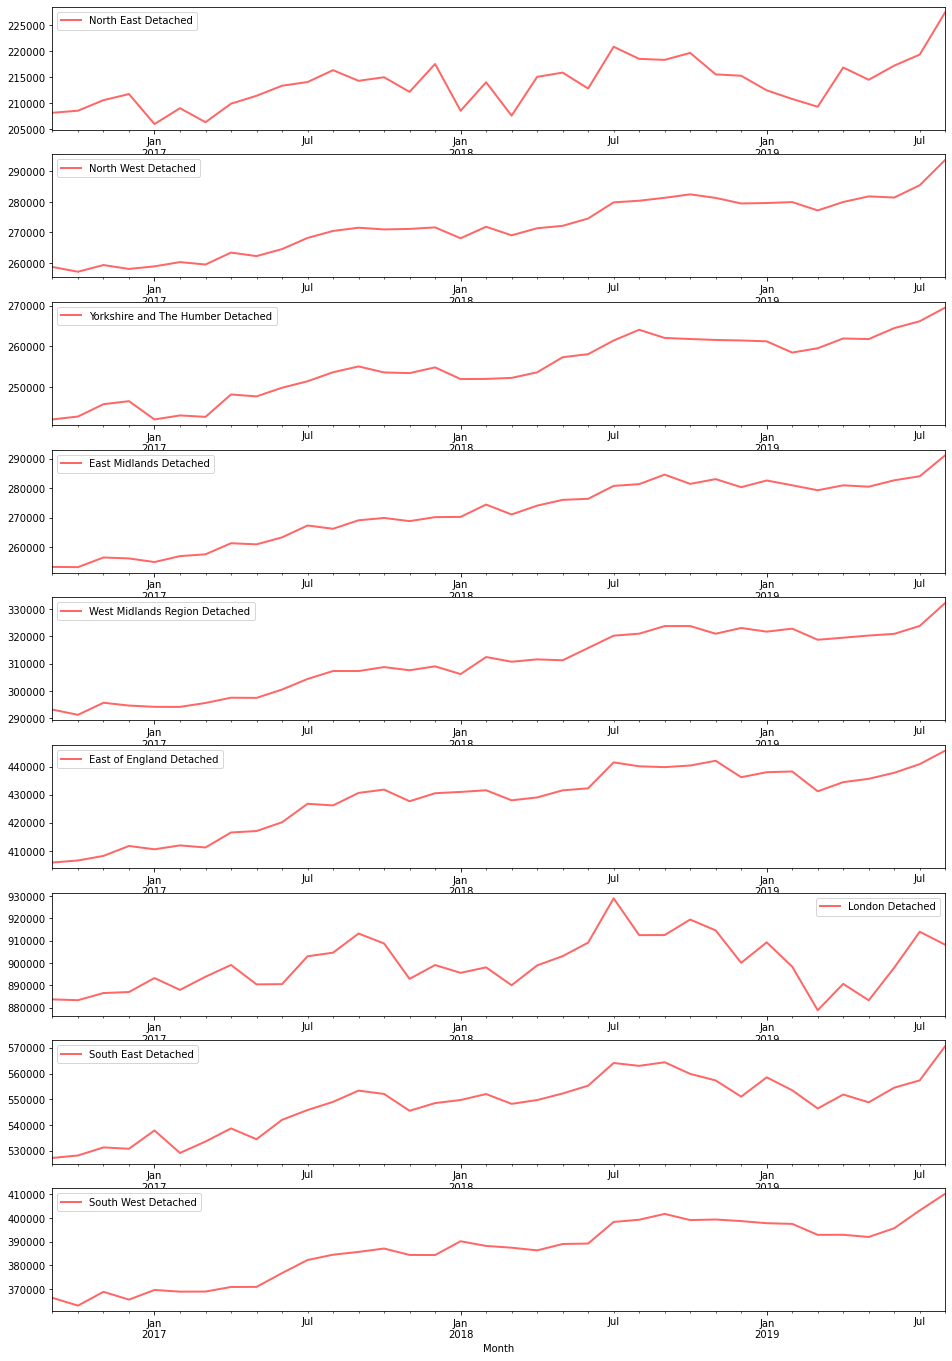

In [12]:
fig, (a1, a2, a3, a4, a5, a6, a7, a8, a9) = plt.subplots(9, 1, figsize=(16,24), sharey=False, sharex=False)

settlement = {'North East':a1,'North West':a2,'Yorkshire and The Humber': a3, 'East Midlands' :a4, 'West Midlands Region' :a5, 'East of England':a6,
              'London':a7, 'South East':a8,'South West': a9}


for i in ['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands Region', 'East of England',
       'London','South East', 'South West'] :

    prices_region.loc[prices_region.Area == i].plot(x = "Month", y = "Detached",  color='r', lw=2, alpha=0.6, label= i+' Detached', ax= settlement[i])


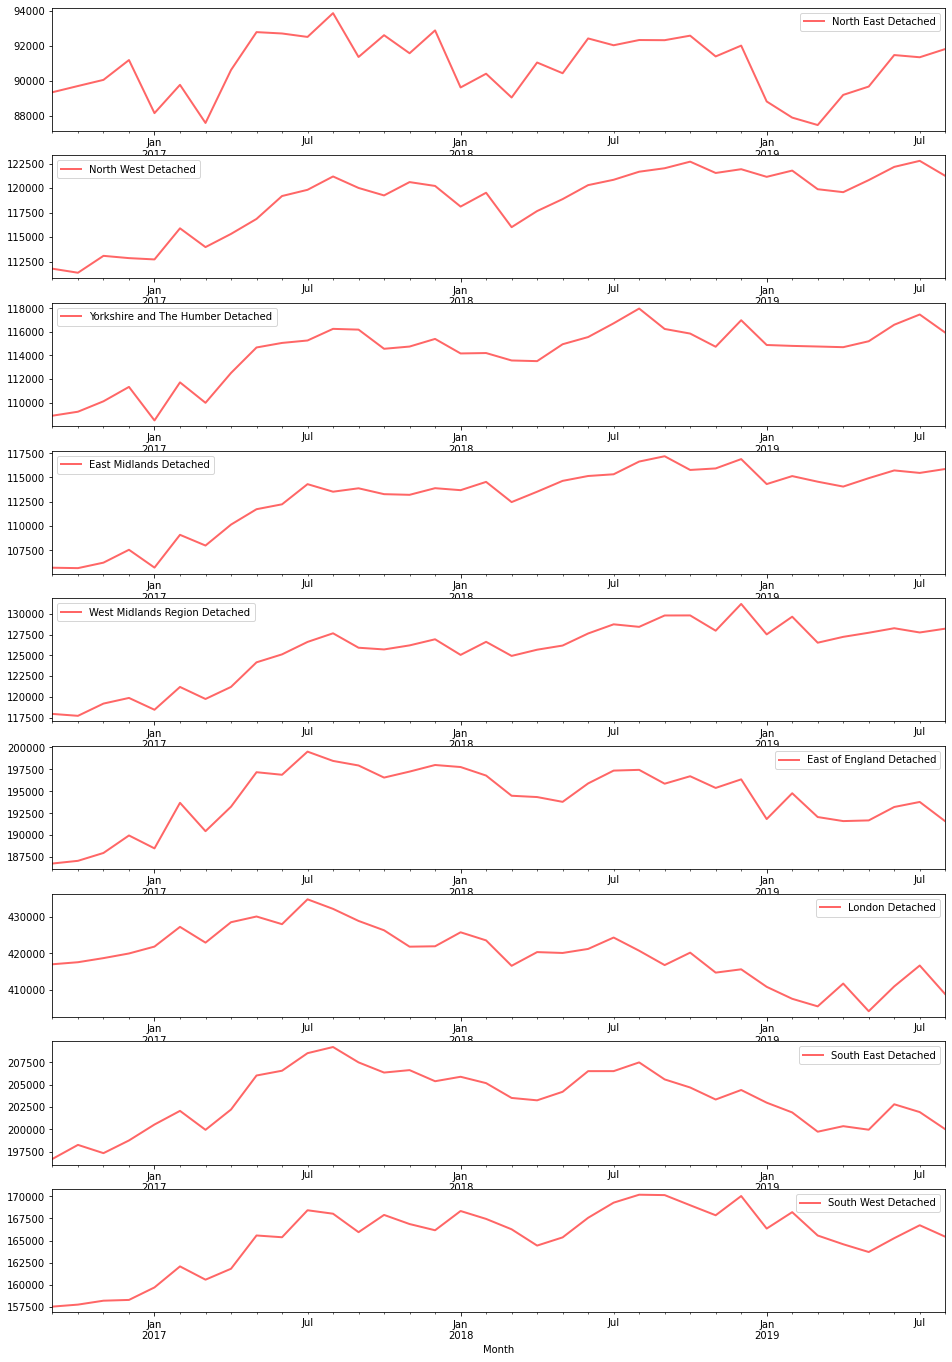

In [13]:
fig, (a1, a2, a3, a4, a5, a6, a7, a8, a9) = plt.subplots(9, 1, figsize=(16,24), sharey=False, sharex=False)

settlement = {'North East':a1,'North West':a2,'Yorkshire and The Humber': a3, 'East Midlands' :a4, 'West Midlands Region' :a5, 'East of England':a6,
              'London':a7, 'South East':a8,'South West': a9}


for i in ['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands Region', 'East of England',
       'London','South East', 'South West'] :

    prices_region.loc[prices_region.Area == i].plot(x = "Month", y = "Flat",  color='r', lw=2, alpha=0.6, label= i+' Detached', ax= settlement[i])


+ ***We found that the trend of price in detached house is climbing up each year, and for most of regions the trend is stable, except for London and North east which have serve fluctuations.***

+ ***Nevertheless, the situation in flat is much more complicated.***
+ ***Firstly, most flats' price are increasing before the July of 2017, and varies a lot since that. For instance, in North East region, there are large portion of drop and rise, and the price return close to the line of 2017 July. Moreover, it also happened in North West, Yorkshire and The Humber, East Midlands, West Midlands and South West Region.***
+ ***Then, rest of regions are basically in a down trend, which is represent most obviously in London.***

### **Section 3: Price Changes**

#### Section 3.A. Use the area data to look at how flat prices have changed.

In [14]:
#Select out the price in July 2017 and July 2018
Area1 = prices_area_region.loc[prices_area_region.Month=='2017-7-01 00:00:00']
Area2 = prices_area_region.loc[prices_area_region.Month=='2018-7-01 00:00:00']
Area = pd.merge(Area1, Area2, on = 'Area')

#Calculate the change and list out.
Area = Area.assign(Price_change = Area.Flat_y-Area.Flat_x).loc[:,('Area','RegionName_x','Price_change')]

display(Area)

,Area,RegionName_x,Price_change
0,Hartlepool,North East,-3891.02012
1,Middlesbrough,North East,150.83825
2,Redcar and Cleveland,North East,-705.01266
3,Stockton-on-Tees,North East,55.22466
4,Darlington,North East,-3362.06155
...,...,...,...
146,Suffolk,East of England,2210.28110
147,Surrey,South East,-2971.83510
148,Warwickshire,West Midlands,1793.77060
149,West Sussex,South East,-1711.65960


#### Section 3.B. Visualize the change in area prices in each region.

In [15]:
#Check the region names in dataset.
Area.RegionName_x.unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'East of England',
       'South East', 'London'], dtype=object)

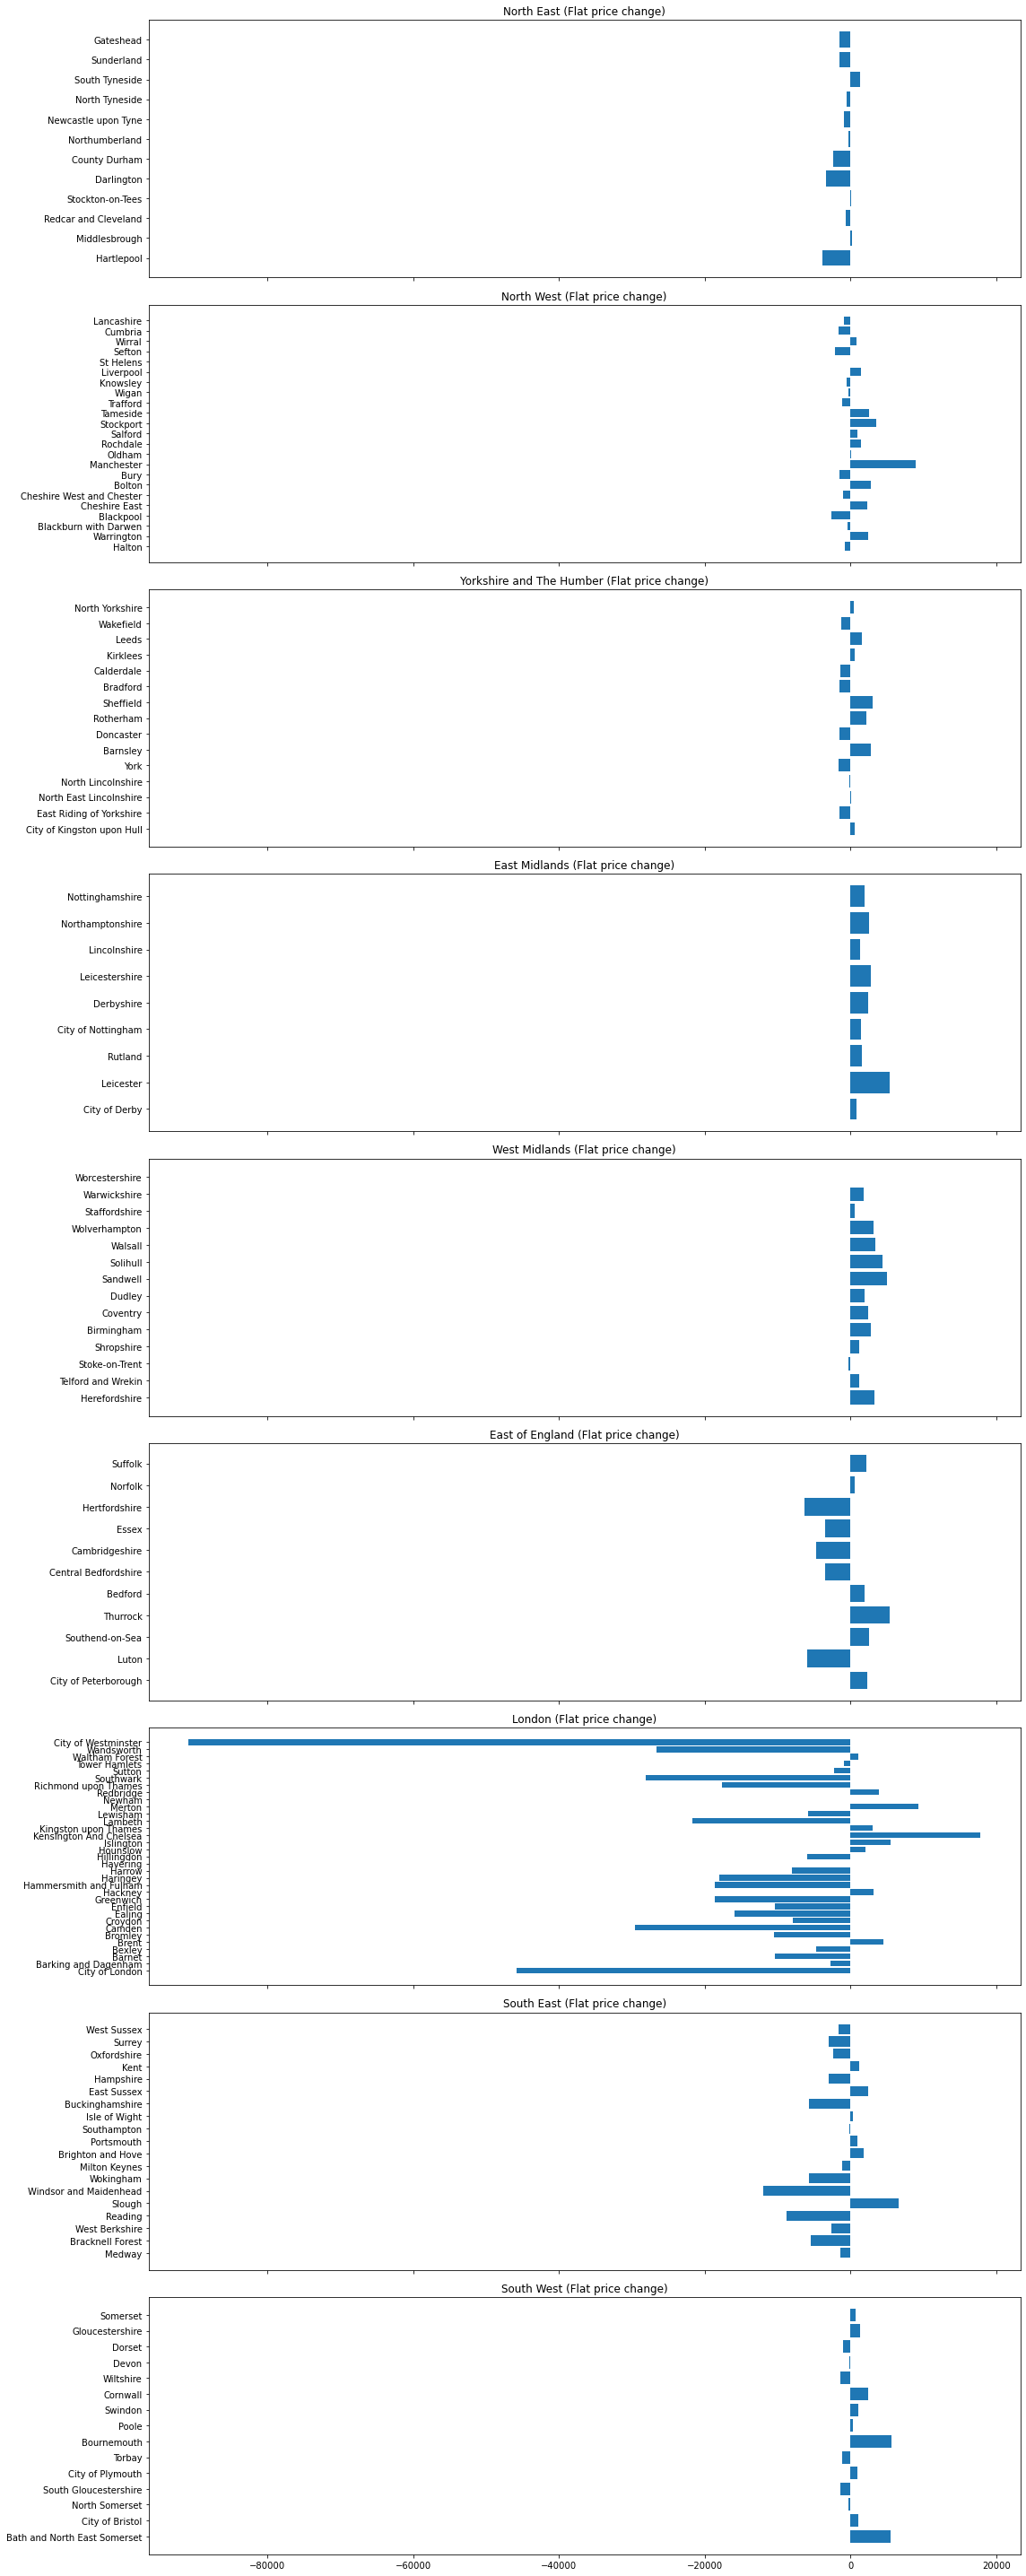

In [21]:
fig, (a1, a2, a3, a4, a5, a6, a7, a8, a9) = plt.subplots(9, 1, figsize=(16,40), sharex=True )

settlement = {'North East':a1,'North West':a2,'Yorkshire and The Humber': a3, 'East Midlands' :a4, 'West Midlands' :a5, 'East of England':a6,
              'London':a7, 'South East':a8,'South West': a9}

for i in Area.RegionName_x.unique():

    settlement[i].barh(Area.loc[Area.RegionName_x == i].Area.tolist(), Area.loc[Area.RegionName_x == i].Price_change.tolist())
    settlement[i].set_title(i+' (Flat price change)')
    
plt.rcParams['figure.autolayout'] = True

+ ***We find that the flats' price in West Midlands and East Midlands have an increase in this year, and rest of regions have varied distribution, except for the London.***
+ ***Most of flats' price in London had experienced a serve drop in this year, especially in the city of Westminster and the city of London(the central area of London).***

### **Section 4: Statistical Analysis**

#### Section 4.A. Cross-tabulate the number of areas in which the price has increased and the number has decreased, by region.

In [22]:
#Classify the price change into ‘positive’ and ‘negative’ groups.
def price_change(row):
    if (row.Price_change > 0) : return 'Increase'
    if (row.Price_change < 0) : return 'Decrease'

Area = Area.assign(Trend = Area.apply(price_change,axis= 1) )    
display(Area)

,Area,RegionName_x,Price_change,Trend
0,Hartlepool,North East,-3891.02012,Decrease
1,Middlesbrough,North East,150.83825,Increase
2,Redcar and Cleveland,North East,-705.01266,Decrease
3,Stockton-on-Tees,North East,55.22466,Increase
4,Darlington,North East,-3362.06155,Decrease
...,...,...,...,...
146,Suffolk,East of England,2210.28110,Increase
147,Surrey,South East,-2971.83510,Decrease
148,Warwickshire,West Midlands,1793.77060,Increase
149,West Sussex,South East,-1711.65960,Decrease


In [23]:
#output the Cross-tabulate
price_change_number = pd.crosstab( [Area.Trend], Area.RegionName_x, margins=True)

price_change_number

RegionName_x,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber,All
Trend,,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7,77
Increase,9,6,10,3,11,6,9,12,8,74
All,9,11,33,12,23,19,15,14,15,151


#### Section 4.B. Use a chi-square test to determine whether there is evidence that the regions differ.

In [24]:
import scipy.stats as stats
test_stat, p_value, dof, expected = stats.chi2_contingency(price_change_number, correction=False)

#excute a chi-square test and output the result.
print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 18 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 6.849 %


+ ***The p-value is larger than 5%, so it means that there is no difference between regions, or we may said that there is no extreme events effects in this one-year period.***
+ ***But what we could not acknowledge is that, as the p-value is quite small, if there are actually difference between regions, we may not find the specific reasons attribute them from this chi-square test.***